In [452]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [453]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [454]:
# File to Load 
mouse_drug_data_to_load = "Class Downloads/mouse_drug_data.csv"
clinical_trial_data_to_load = "Class Downloads/clinicaltrial_data.csv"

In [455]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df=pd.read_csv(mouse_drug_data_to_load)
clinical_df=pd.read_csv(clinical_trial_data_to_load)

In [456]:
# Combine the data into a single dataset
# Display the data table for preview
df=pd.merge(mouse_df, clinical_df, on="Mouse ID")
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [457]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint and convert to dataframe
mean_tumor_volume_df=pd.DataFrame(df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index())
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [458]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
sem_tumor_volume_df=pd.DataFrame(df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index())
sem_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [459]:
#Reformat DataFrames
mean_tumor_volume_df=mean_tumor_volume_df.pivot_table(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')

sem_tumor_volume_df=sem_tumor_volume_df.pivot_table(index='Timepoint', columns='Drug',values='Tumor Volume (mm3)')



In [460]:
mean_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [461]:
sem_tumor_volume_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [462]:
#Creating a scatter plot that shows how the tumor volume 
#changes over time for each treatment.

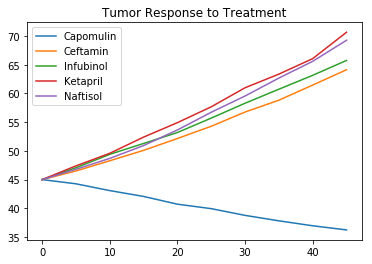

In [463]:
ax=plt.gca()
mean_tumor_volume_df.plot(kind='line', x=np.arange(0,50,5), y='Capomulin', ax=ax)
mean_tumor_volume_df.plot(kind='line', x=np.arange(0,50,5), y='Ceftamin', ax=ax)
mean_tumor_volume_df.plot(kind='line', x=np.arange(0,50,5), y='Infubinol', ax=ax)
mean_tumor_volume_df.plot(kind='line', x=np.arange(0,50,5), y='Ketapril', ax=ax)
mean_tumor_volume_df.plot(kind='line', x=np.arange(0,50,5), y='Naftisol', ax=ax)

plt.title("Tumor Response to Treatment")


In [464]:
## Metastatic Response to Treatment
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Store in dataframe

In [465]:
mean_met_response_df=pd.DataFrame(df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index())
mean_met_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [466]:
sem_met_response_df=pd.DataFrame(df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index())
sem_met_response_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [467]:
#Reformat DataFrames
mean_met_response_df=mean_met_response_df.pivot_table(index='Timepoint', columns='Drug',values='Metastatic Sites')

sem_met_response_df=sem_met_response_df.pivot_table(index='Timepoint', columns='Drug',values='Metastatic Sites')

In [468]:
mean_met_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [469]:
sem_met_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


In [470]:
#Plot
#Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

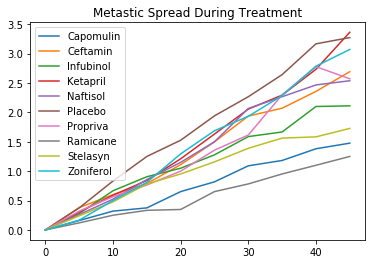

In [471]:
ax=plt.gca()
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Capomulin', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Ceftamin', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Infubinol', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Ketapril', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Naftisol', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Placebo', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Propriva', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Ramicane', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Stelasyn', ax=ax)
mean_met_response_df.plot(kind='line', x=np.arange(0,50,5), y='Zoniferol', ax=ax)
plt.title("Metastic Spread During Treatment")







In [472]:
#Survival Rates
#Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
#Convert to DataFrame

In [473]:
survival_df=pd.DataFrame(df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count())


In [474]:
survival_df_pivot=survival_df.pivot_table(index="Timepoint", columns="Drug", values="Mouse ID")
survival_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [475]:
drug_names=survival_df_pivot.columns.tolist()
drug_names

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [476]:
for drug in drug_names:
    for i in np.arange(0,50,5):
        survival_rate_df.loc[i][drug]=survival_df_pivot.loc[i][drug]/survival_df_pivot.loc[0][drug]*100

In [477]:
survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100,100,100,100,100,100,100,100,100,100
5,100,84,100,92,92,96,96,100,96,96
10,100,80,84,88,84,96,88,96,88,88
15,96,76,84,76,84,80,65,96,88,84
20,92,72,80,76,80,76,65,92,80,68
25,88,72,72,76,72,68,53,92,73,64
30,88,64,68,72,60,60,50,92,69,60
35,88,56,48,68,60,56,38,84,61,56
40,84,56,40,60,60,48,34,80,46,56


In [230]:
#Plot
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

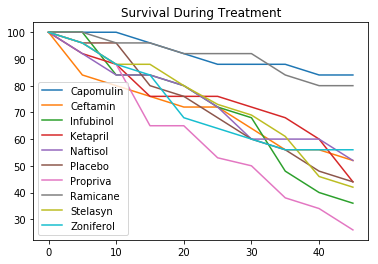

In [481]:
ax=plt.gca()
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Capomulin', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Ceftamin', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Infubinol', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Ketapril', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Naftisol', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Placebo', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Propriva', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Ramicane', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Stelasyn', ax=ax)
survival_rate_df.plot(kind='line', x=np.arange(0,50,5), y='Zoniferol', ax=ax)

plt.title("Survival During Treatment")

In [142]:
#Summary 
# Calculate the total % tumor volume change for each drug across the full 45 days.
# Display the data to confirm


In [442]:

tumor_change_list=[]
for drug in mean_tumor_volume_df.columns:
    change=(mean_tumor_volume_df[drug][45]-mean_tumor_volume_df[drug][0])/mean_tumor_volume_df[drug][0]*100
    tumor_change_list.append([drug, change])


tumor_change_tuple=tuple(tumor_change_list)

tumor_change_tuple

(['Capomulin', -19.475302667894173],
 ['Ceftamin', 42.516491855897442],
 ['Infubinol', 46.123471727851872],
 ['Ketapril', 57.028794686606076],
 ['Naftisol', 53.92334713476923],
 ['Placebo', 51.297960483151527],
 ['Propriva', 47.241174863206368],
 ['Ramicane', -22.320900462766673],
 ['Stelasyn', 52.085134287899024],
 ['Zoniferol', 46.579750865095249])

In [482]:
tumor_chat=tumor_change_tuple.plot(kind='bar')

AttributeError: 'tuple' object has no attribute 'plot'